In [ ]:
#Aadhar Linking
#Representing Data and Engineering Features: We will get categorical(discrete) features for columns like occupation¶
#https://www.safaribooksonline.com/library/view/introduction-to-machine/9781449369880/ch04.html


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import zero_one_loss
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
def getInOut():
    dataset = pd.read_csv('/Users/rajeshgudikoti/Documents/learning/UIDAI/samplevoterlist/sample1_voterlist.csv',dtype={'Age': np.int32}
                     #,names=['VoterID', 'Name','Father Name', 'Age', 'Gender',  'AadharLinked']
                     );
    print(dataset.shape);
    # data required for feature set
    dataset = dataset[['Age', 'Gender','Occupation','Income','AadharLinked']]
    #(dataset.head());
    df = pd.DataFrame(dataset);
    print(dataset.head())
    
    #print('\n***********\n',dataset.Gender[1:,].value_counts())
    #print('\n***********\n',(df.loc[1:,'Gender']).value_counts())

    print("Original features:\n", list(dataset.columns), "\n")
    dataset_dummies = pd.get_dummies(dataset)
    print("Features after get_dummies:\n", list(dataset_dummies.columns))
    
    #dataset_dummies = dataset_dummies.loc[:, ['Age', 'Gender_F', 'Gender_M']]
    #print("Features after trimming:\n", list(dataset_dummies))
    dataset_dummies.head()
    #features = dataset_dummies.loc[:, ['Age', 'Gender_F', 'Gender_M']] # X.shape: (1097, 3)
    features = dataset_dummies.loc[:, ['Age', 'Gender_F', 'Gender_M','Occupation_Business', 'Occupation_Govt', 
                                       'Occupation_Housewife', 'Occupation_Software', 'Income_0-10k', 
                                       'Income_11k-20k', 'Income_21k-30k', 'Income_31k-50k', 'Income_50k Above']]
    # Extract NumPy arrays
    X = features.values
    #print('\n \n *********** \n', X[1:10,:])
    y = dataset_dummies['AadharLinked'].values
    print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))
    #print('dataset_dummies ',type(dataset_dummies))
    

    return (X,y,dataset,dataset_dummies)

#print(getInOut())

In [3]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
    for i in range(len(y_hat)):
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==0:
           TN += 1
    for i in range(len(y_hat)): 
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
    return(TP, FP, TN, FN)

In [4]:
def visulaization(X_validation, predictions):
    fig,ax = plt.subplots(figsize=(12,4));
    X_input = X_validation[:,0]
    #print('X_input ',X_input)
    print(X_input.shape, predictions.shape)
    ax.plot(X_input,predictions,'b',label='Aadhar Linking')
    ax.set_title('Testing')
    ax.scatter(X_input,predictions)
    ax.set_xlabel('X-Age')
    ax.set_ylabel('Aadharlinked')
    #plt.show()

    fig = plt.figure()
    fig.add_subplot(241)
    plt.plot(X_validation[:,0],predictions,'bo')
    plt.xlabel('Age')
    plt.ylabel('Aadharlinked')

    fig.add_subplot(242)
    plt.plot(X_validation[:,1],predictions,'go')
    plt.xlabel('Gender')
    plt.ylabel('Aadharlinked')

    fig.add_subplot(243)
    plt.plot(X_validation[:,2],predictions,'ro')
    plt.xlabel('Occupation')
    plt.ylabel('Aadharlinked')

    fig.add_subplot(244)
    plt.plot(X_validation[:,3],predictions,'bo')
    plt.xlabel('Income')
    plt.ylabel('Aadharlinked')

    plt.show()

(1097, 9)
   Age Gender Occupation     Income  AadharLinked
0   96      F   Business    31k-50k             1
1   71      F       Govt    21k-30k             0
2   94      F   Business  50k Above             0
3   97      F       Govt    31k-50k             1
4   40      F       Govt    31k-50k             0
Original features:
 ['Age', 'Gender', 'Occupation', 'Income', 'AadharLinked'] 

Features after get_dummies:
 ['Age', 'AadharLinked', 'Gender_F', 'Gender_M', 'Occupation_Business', 'Occupation_Govt', 'Occupation_Housewife', 'Occupation_Software', 'Income_0-10k', 'Income_11k-20k', 'Income_21k-30k', 'Income_31k-50k', 'Income_50k Above']
X.shape: (1097, 12)  y.shape: (1097,)
Test score: 0.77

 confusion_matrix 
 [[138  31]
 [ 39  12]]

 accuracy  0.681818181818
percentage of loss  0.318181818182
no. of wrong items FP+FN 70
TP, FP, TN, FN


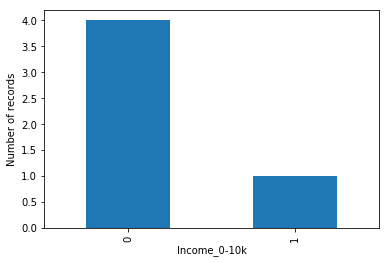

In [12]:
X,y,dataset,dataset_cat_dummies = getInOut();
validation_size = 0.20
#seed = 7
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=0)

#print('\n******* X_validation[:,2] \n',X_validation[:,2]);

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Test score: {:.2f}".format(logreg.score(X_validation, y_validation)))

classifier = RandomForestClassifier(n_estimators=15)
rfc = classifier.fit(X_train,y_train)

predictions = rfc.predict(X_validation)
#print('**************\n',predictions);

cm = confusion_matrix(y_validation,predictions)
accuracy = accuracy_score(y_validation,predictions)
print('\n confusion_matrix \n',cm)
print('\n accuracy ',accuracy)

correct_indices = []

for i in range(len(predictions)):
    if(predictions[i]==y_validation[i]==True or predictions[i]==y_validation[i]==False ):
        #print('\n index ', i, ' predictions[i]', predictions[i],' y_validation[i] ', y_validation[i])
       correct_indices.append(i)
#print('\n correct_indices \n',correct_indices);

print('percentage of loss ',zero_one_loss(predictions,y_validation)) # percentage of loss
print('no. of wrong items FP+FN',zero_one_loss(predictions,y_validation,normalize=False)) # no. of wrong items # FP+FN
print('TP, FP, TN, FN')
perf_measure(y_validation,predictions) # returns (TP, FP, TN, FN) 
#visulaization(X_validation,predictions)
new_df = convertToDataFrame(X_validation,predictions)
visualizeBarGraph(new_df)

In [7]:
# convert ndarray to dataframe and assign column headers
def convertToDataFrame(X_validation,predictions):
    z = np.column_stack((X_validation,predictions))
    new_col_list = []
    #print(list(dataset_cat_dummies))
    new_col_list = list(dataset_cat_dummies)
    new_col_list.append('y_predict')
    new_col_list.remove('AadharLinked')
    #print(new_col_list)
    new_df = pd.DataFrame.from_records(z,columns=new_col_list)
    #print(new_df.head(5))
    return new_df

In [11]:
def visualizeBarGraph(new_df):
    new_df = new_df.head(5)
    for column in new_df:
        new_df['Income_0-10k'].value_counts().plot(kind='bar')
    plt.xlabel('Income_0-10k')
    plt.ylabel("Number of records")
    plt.show()

(1097, 9)
   Age Gender Occupation     Income  AadharLinked
0   96      F   Business    31k-50k             1
1   71      F       Govt    21k-30k             0
2   94      F   Business  50k Above             0
3   97      F       Govt    31k-50k             1
4   40      F       Govt    31k-50k             0
Original features:
 ['Age', 'Gender', 'Occupation', 'Income', 'AadharLinked'] 

Features after get_dummies:
 ['Age', 'AadharLinked', 'Gender_F', 'Gender_M', 'Occupation_Business', 'Occupation_Govt', 'Occupation_Housewife', 'Occupation_Software', 'Income_0-10k', 'Income_11k-20k', 'Income_21k-30k', 'Income_31k-50k', 'Income_50k Above']
X.shape: (1097, 12)  y.shape: (1097,)
X[1:5] :  [[71  1  0  0  1  0  0  0  0  1  0  0]
 [94  1  0  1  0  0  0  0  0  0  0  1]
 [97  1  0  0  1  0  0  0  0  0  1  0]
 [40  1  0  0  1  0  0  0  0  0  1  0]]
dbtype:  <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>
Gender_M  Gender_F
0         1           529
1        

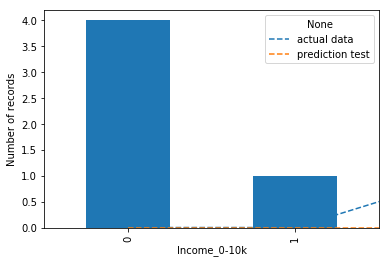

In [6]:
X,y,dataset,dataset_cat_dummies = getInOut();
#plt.plot(range(len(X_train)), y_train, label="train")
#plt.plot(range(len(X_train), len(y_validation) + len(X_train)), y_validation, '-', label="test")
#plt.plot(range(len(X_train)), y_train, '--', label="prediction train")

#plt.plot(range(len(X_train), len(y_validation) + len(X_train)), predictions, '--',label="prediction test")
#print(range(len(X_validation[:,3])))

X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
classifier = RandomForestClassifier(n_estimators=15)
rfc = classifier.fit(X_train,y_train)
predictions = rfc.predict(X_validation)

print('X[1:5] : ',X[1:5])
#print('predictions',predictions==True)
print('dbtype: ',type(X), type(X_validation),type(dataset_cat_dummies))
group_by_cf = dataset_cat_dummies.groupby(['Gender_M','Gender_F'])
print(group_by_cf.size())
plt.plot(range(len(X[1:200])), y[1:200], '--',label="actual data")
plt.plot(range(len(X_validation)), predictions, '--',label="prediction test")
plt.legend(loc=(1.01, 1))
plt.xlabel("X")
plt.ylabel("Y")

#for col in X_validation.select_dtypes(include=["category"]):
#X_validation[col].value_counts().plot(kind='bar')
print('shape ',X_validation.shape,y_validation.shape,'\n',X_validation[0],'\n',X_validation[1])
#X_validation = np.concatenate(X_validation,y_validation) 
#X_validation = np.hstack([X_validation,y_validation])
#X_validation = np.append(X_validation,y_validation)
#X_validation = np.column_stack((X_validation,y_validation))
#print('\n',X_validation[0], y_validation[0],X_validation[13])
#X_validation = X_validation.reshape(220,13)
#print('shape ',X_validation.shape,'\n','\n',X_validation[0])

#X_validation = X_validation.flatten();
#y_validation = y_validation.flatten();
#z_concat=[]
#z_concat = np.concatenate((X_validation,y_validation),axis=0)
#print('after concatenate ',z_concat,'\n',z_concat.shape,'\n',z_concat[0],'\n',z_concat[14])
#z_reshape = np.reshape(z_concat,(220,13), order='C')
#print('after reshape ',z_reshape.shape,'\n',z_reshape[0],'\n',z_reshape[1])


#print(X_validation.shape, y_validation.shape)
z = np.column_stack((X_validation,y_validation))
#print(z.shape,'\n',z[0],'\n',z[1])

# convert ndarray to dataframe and assign column headers
new_col_list = []
#print(list(dataset_cat_dummies))
new_col_list = list(dataset_cat_dummies)
new_col_list.append('y_predict')
new_col_list.remove('AadharLinked')
#print(new_col_list)
new_df = pd.DataFrame.from_records(z,columns=new_col_list)
#print(new_df.head(5))
new_df = new_df.head(5)
for column in new_df:
    new_df['Income_0-10k'].value_counts().plot(kind='bar')
plt.xlabel('Income_0-10k')
plt.ylabel("Number of records")
plt.show()

In [ ]:
(X,y,dataset,dataset_cat_dummies) = getInOut();
#dataset.plot(kind='scatter', x='Age', y='AadharLinked', figsize=(12,8))
#plt.show()

#for col in dataset_dummies.select_dtypes(include=["category"]):
        #dataset_dummies[col].value_counts().plot(kind='bar')
dataset['Occupation'].value_counts().plot(kind='bar')
dataset['Gender'].value_counts().plot(kind='bar')
dataset['Income'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=0)
print(X_validation.shape, y_validation.shape)
z = np.column_stack((X_validation,y_validation))
print(z.shape,'\n',z[0],'\n',z[1])
print(list(dataset))
new_df = pd.DataFrame({'input':X_validation.tolist(), 'output':y_validation.tolist()})
print(type(z),len(z[:,12]))
#dataset_cat_dummies.assign(y_predict=z[:,12])
#print(list(new_df),new_df)

#print(new_df)
new_col_list = []
print(list(dataset_cat_dummies))
new_col_list = list(dataset_cat_dummies)
new_col_list.append('y_predict')
new_col_list.remove('AadharLinked')
print(new_col_list)
#new_df = pd.DataFrame({new_col_list: z.tolist()})
new_df = pd.DataFrame.from_records(z,columns=new_col_list)
print(new_df)

In [ ]:
#plt.clf()
#plt.cla()
print(X_validation[:,3])
ax1.plot(X_validation[:,3],predictions,'b',label='Aadhar Linking')
ax1.set_title('Testing')
ax1 = plt.subplot2grid((5,10),(0,0),rowspan=5, colspan=10)
ax1.scatter(X_validation[:,3],predictions)
ax.set_xlabel('X-Income')
ax.set_ylabel('Aadharlinked')
#plt.sca(ax[1, 1])
plt.xticks(range(5), ['Income_0-10k', 'Income_11-20k', 'Income_21-30k','Income_31-50k','Income_50k Above'], color='red')

plt.show()